In [32]:
#import library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
print(tf.__version__)

2.2.0


In [33]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2020-07-16 13:38:45--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.91MB/s    in 47s     

2020-07-16 13:39:34 (6.49 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [34]:
#extrak file
import zipfile,os
local_zip ='/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [35]:
#pengelolaan file
import shutil
shutil.rmtree('/tmp/__MACOSX')
shutil.rmtree('/tmp/rockpaperscissors/rps-cv-images')
os.remove('/tmp/rockpaperscissors.zip')
# buat direktori
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'val')
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [37]:
#path direktori
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir,'paper')
scissors_dir = os.path.join(base_dir,'scissors')

# bagi direktori kelas data jadi data train dan data val
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.2)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.2)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size=0.2)

In [39]:
# path untuk direktori training & validation pada kelas data
train_rock = os.path.join(train_dir,'rock')
train_paper = os.path.join(train_dir,'paper')
train_scissors = os.path.join(train_dir,'scissors')
val_rock = os.path.join(validation_dir,'rock')
val_paper = os.path.join(validation_dir,'paper')
val_scissors = os.path.join(validation_dir,'scissors')

In [40]:
# buat direktori di dalam direktori train
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

# membuat direktori di dalam direktori validation
if not os.path.exists(valid_rock):
  os.mkdir(val_rock)
if not os.path.exists(valid_paper):
  os.mkdir(val_paper)
if not os.path.exists(valid_scissors):
  os.mkdir(val_scissors)

In [41]:
#paste data train ke direktori baru
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

#paste data validation ke direktori baru
for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [43]:
#proses augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')


In [44]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori train
        target_size=(150, 150), 
        batch_size=32,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori validasi
        target_size=(150, 150),
        batch_size=32, 
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [52]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('loss') < 0.1):
      print()
      print("akurasi mencapai lebih dari 95%!")
      self.model.stop_training = True

callbacks = myCallback()


In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [54]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [55]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2,
    callbacks=[callbacks]
)

Epoch 1/20
25/25 - 7s - loss: 0.6323 - accuracy: 0.3967 - val_loss: 0.5305 - val_accuracy: 0.6938
Epoch 2/20
25/25 - 7s - loss: 0.3702 - accuracy: 0.7613 - val_loss: 0.2604 - val_accuracy: 0.8500
Epoch 3/20
25/25 - 7s - loss: 0.2179 - accuracy: 0.8834 - val_loss: 0.1837 - val_accuracy: 0.9187
Epoch 4/20
25/25 - 7s - loss: 0.1772 - accuracy: 0.9050 - val_loss: 0.1530 - val_accuracy: 0.9375
Epoch 5/20
25/25 - 7s - loss: 0.1489 - accuracy: 0.9150 - val_loss: 0.1367 - val_accuracy: 0.9125
Epoch 6/20
25/25 - 7s - loss: 0.1244 - accuracy: 0.9337 - val_loss: 0.1742 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 7s - loss: 0.1677 - accuracy: 0.8973 - val_loss: 0.1668 - val_accuracy: 0.9250
Epoch 8/20
25/25 - 7s - loss: 0.1151 - accuracy: 0.9312 - val_loss: 0.1043 - val_accuracy: 0.9500
Epoch 9/20

akurasi mencapai lebih dari 95%!
25/25 - 7s - loss: 0.0995 - accuracy: 0.9438 - val_loss: 0.1457 - val_accuracy: 0.9312


Saving 1MOm36DHK0R8OfIC.png to 1MOm36DHK0R8OfIC.png
1MOm36DHK0R8OfIC.png
Rock


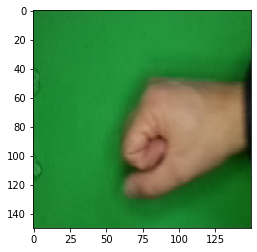

In [58]:
#penentuan gambar dari gambar yg diupload
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print("Paper")
  elif classes[0,1]!=0:
    print("Rock")
  else:
    print("Scissors")
